## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#37ABC4;"> Biomechanical Feature-Based Patient Condition Prediction

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;"> Data Understanding 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [51]:
df1=pd.read_csv("C:\GL_Projects\Supervised_learning/Normal.csv")
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [52]:
df2=pd.read_csv("C:\GL_Projects\Supervised_learning/Type_H.csv")
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [53]:
df3=pd.read_csv("C:\GL_Projects\Supervised_learning/Type_S.csv")
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [54]:

print("shape of df1 is: ", df1.shape)
print("Columns of df1 is: ", df1.columns.to_list())
print("")
print("shape of df2 is: ", df2.shape)
print("Columns of df2 is: ", df2.columns.to_list())
print("")
print("shape of df3 is: ", df3.shape)
print("Columns of df3 is: ", df3.columns.to_list())

shape of df1 is:  (100, 7)
Columns of df1 is:  ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']

shape of df2 is:  (60, 7)
Columns of df2 is:  ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']

shape of df3 is:  (150, 7)
Columns of df3 is:  ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']


In [55]:
df1.columns.equals(df2.columns)

True

In [56]:
df2.columns.equals(df3.columns)

True

In [57]:
df3.columns.equals(df1.columns)

True

There are 7 columns and the column names are same in all the 3 dataframes


In [58]:
df1.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [59]:
df2.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [60]:
df3.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [61]:
df1.Class.value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [62]:
df2.Class.value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [63]:
df3.Class.value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;"> Data Preparation and Exploration: 

In [64]:
df_1 =  df1.replace(to_replace ='Nrmal', value = 'Normal', regex = True)
df_2 =  df2.replace(to_replace ='type_h', value = 'Type_H', regex = True)
df_3 =  df3.replace(to_replace ='tp_s', value = 'Type_S', regex = True)

In [65]:
df_1.Class.value_counts()

Normal    100
Name: Class, dtype: int64

In [66]:
df_2.Class.value_counts()

Type_H    60
Name: Class, dtype: int64

In [67]:
df_3.Class.value_counts()

Type_S    150
Name: Class, dtype: int64

#### Combining all the 3 DataFrames to form a single DataFrame 

In [68]:
df_m1 = pd.merge(df_1, df_2, how="outer")
df = pd.merge(df_m1, df_3, how="outer")
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [69]:
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
293,70.250436,10.340123,76.370070,59.910314,119.237007,32.666502,Type_S
144,56.030218,16.297915,62.275275,39.732303,114.023117,-2.325684,Type_H
289,82.406524,29.276422,77.054565,53.130102,117.042244,62.765348,Type_S
218,65.536003,24.157487,45.775170,41.378515,136.440302,16.378086,Type_S
203,49.782121,6.466805,53.000000,43.315316,110.864783,25.335647,Type_S


In [70]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [71]:
# 5 point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;"> Data Analysis

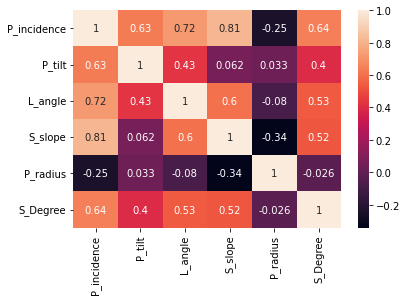

In [72]:
sns.heatmap(data=df.corr(), annot=True);

### Insights on correlation.

i. Features having stronger correlation with correlation value.

ii. Features having weaker correlation with correlation value.

1. P_incidence and S_slope has the stronger correlation
2. S_slope and P_radius has the weaker correlation

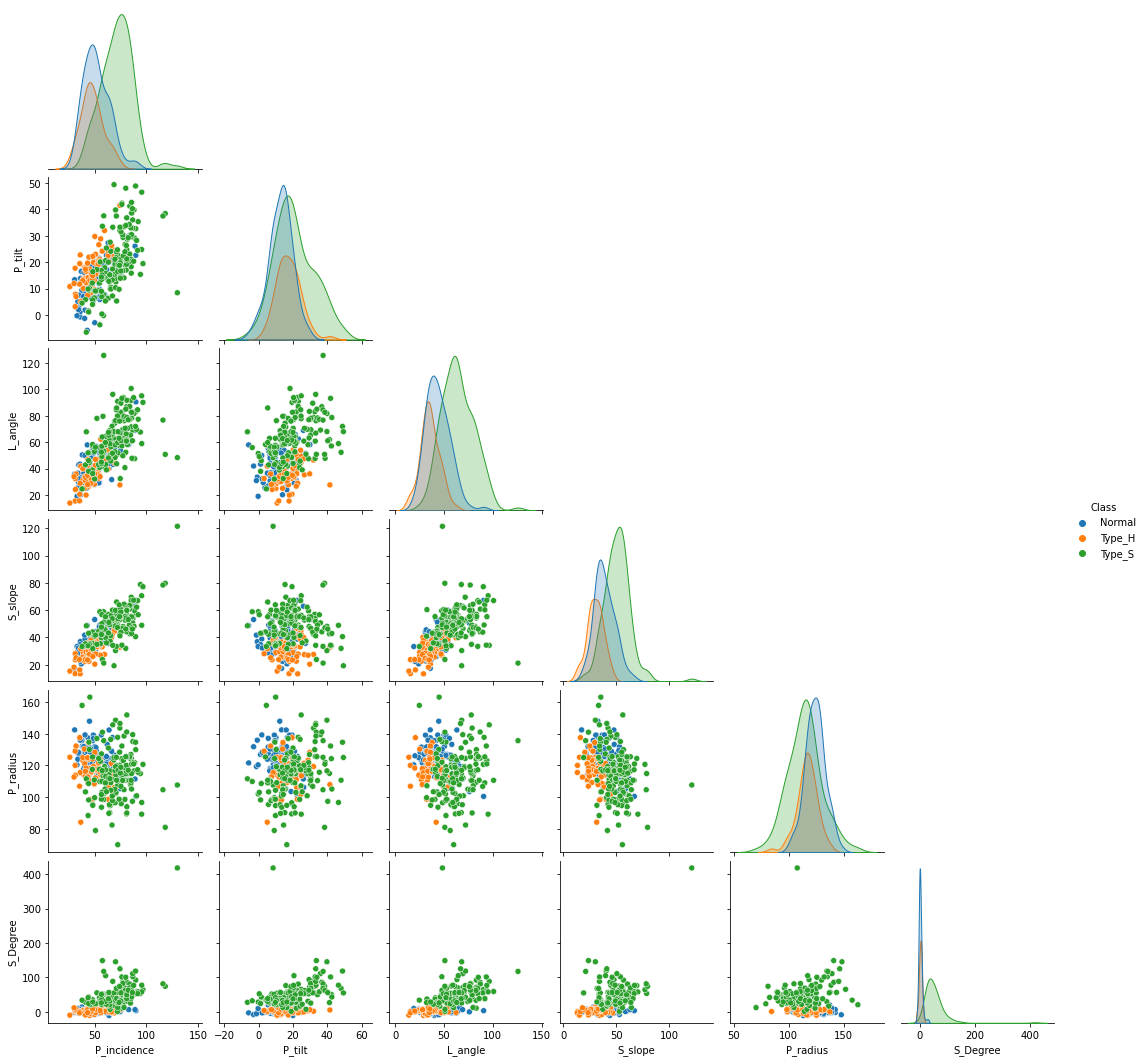

In [73]:
sns.pairplot(data=df, hue='Class', corner=True);

1. L_angle and P_incidence are linearly correlated
2. S_slope and P_incidence are linearly correlated
3. S_slope and L_angle are also linearly correlated
4. Other features are not correlated

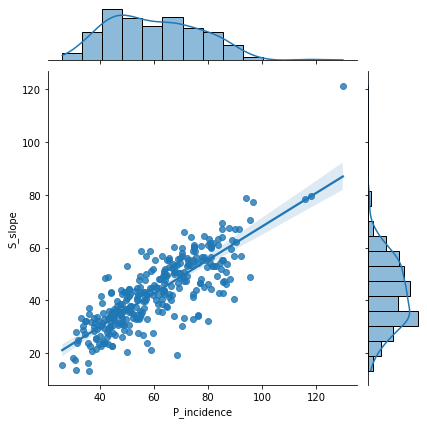

In [74]:
sns.jointplot(data=df, x='P_incidence', y='S_slope', kind='reg');

1. P_incidence and S_slope are linearly correlated.
2. P_incidence has bimodal distribution and positively skewed.
3. S_slope distribution is also positively skewed

In [75]:
df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

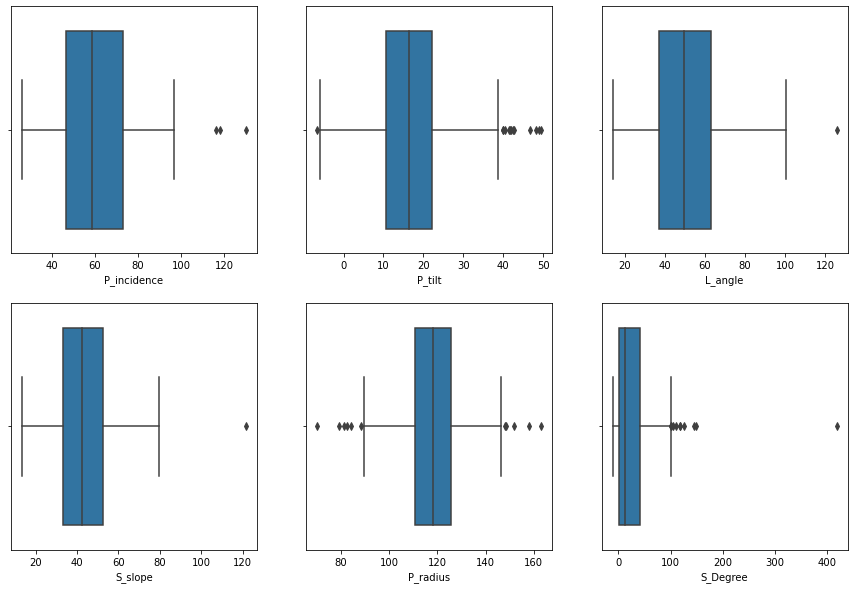

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='P_incidence')
sns.boxplot(ax=axes[0, 1], data=df, x='P_tilt')
sns.boxplot(ax=axes[0, 2], data=df, x='L_angle')
sns.boxplot(ax=axes[1, 0], data=df, x='S_slope')
sns.boxplot(ax=axes[1, 1], data=df, x='P_radius')
sns.boxplot(ax=axes[1, 2], data=df, x='S_Degree')
plt.show()

Outliers:
1. S_slope and L_angle are not much affected by outliers
2. P_incidence, P_tilt nd S_Degree are moderately affected by outliers
3. P_radius are highly affected by outliers

Distribution:
1. P_incidence has bimodal distribution and positively skewed.
2. P_tilt and P_radius has a normal distribution
3. L_angle and S_slope are positively skewed



### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;"> Model Building

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix, roc_auc_score

In [78]:
X = df.drop(labels='Class', axis=1)
y = df['Class']
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [79]:
y.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Class, dtype: object

In [80]:
# Spliting the data into train and test with 80:20 proportion.

XScaled  = X.apply(zscore) 
XScaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,1.042177e-16,2.096889e-16,1.980495e-16,2.829278e-17,-5.071212e-16,-1.277204e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


In [81]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.20, random_state=1)

In [82]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)

Shape of X_train:  (248, 6)
Shape of X_test:  (62, 6)


In [83]:
# Training a Supervised Learning Classification base model using KNN classifier.

KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [84]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [85]:
predicted = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7258064516129032

In [86]:
predicted

array(['Type_S', 'Type_S', 'Normal', 'Normal', 'Normal', 'Type_H',
       'Type_S', 'Type_H', 'Type_H', 'Type_S', 'Type_H', 'Type_S',
       'Normal', 'Type_H', 'Type_S', 'Type_H', 'Type_S', 'Type_S',
       'Type_S', 'Normal', 'Type_S', 'Type_S', 'Normal', 'Type_S',
       'Normal', 'Type_S', 'Normal', 'Type_S', 'Normal', 'Type_S',
       'Type_S', 'Type_S', 'Type_S', 'Type_S', 'Normal', 'Normal',
       'Normal', 'Type_S', 'Type_H', 'Type_H', 'Type_S', 'Type_S',
       'Normal', 'Type_S', 'Type_H', 'Type_H', 'Type_S', 'Type_S',
       'Normal', 'Type_S', 'Normal', 'Type_S', 'Normal', 'Normal',
       'Type_S', 'Type_S', 'Normal', 'Normal', 'Type_H', 'Normal',
       'Normal', 'Type_S'], dtype=object)

In [87]:
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test, predicted)))

Model Accuracy: 0.7258


Confusion Matrix


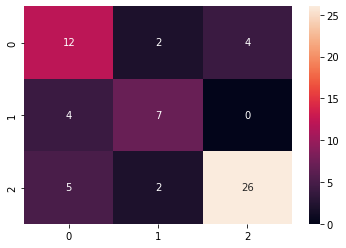

In [88]:
print("Confusion Matrix")
cm=confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True);

In [89]:
confusion_matrix = pd.crosstab (y_test, predicted, rownames= ['Actual'], colnames= ['Predicted']) 
print (confusion_matrix)

Predicted  Normal  Type_H  Type_S
Actual                           
Normal         12       2       4
Type_H          4       7       0
Type_S          5       2      26


In [90]:
print("Classification Report")
print(classification_report(y_test, predicted))

Classification Report
              precision    recall  f1-score   support

      Normal       0.57      0.67      0.62        18
      Type_H       0.64      0.64      0.64        11
      Type_S       0.87      0.79      0.83        33

    accuracy                           0.73        62
   macro avg       0.69      0.70      0.69        62
weighted avg       0.74      0.73      0.73        62



### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;"> Performance Improvement


In [91]:
#Hyperparameter optimization

error = []

for i in range(1,16):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

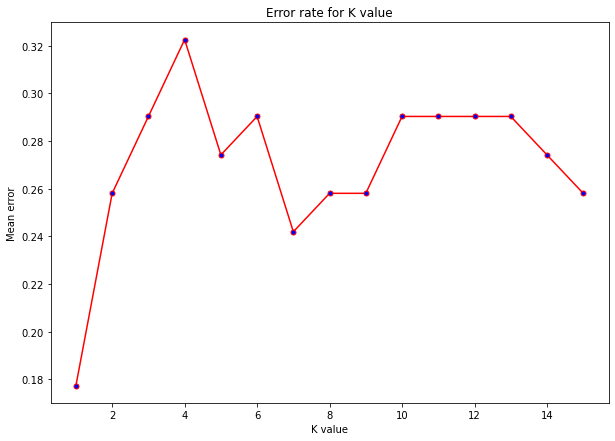

In [92]:
plt.figure(figsize=(10,7))
plt.plot(range(1,16), error, color='red', marker='o', markerfacecolor='blue', markersize='5')
plt.title("Error rate for K value")
plt.xlabel("K value")
plt.ylabel("Mean error")
plt.show()

K value of 7 neighbors has lesser mean error. So n_neighbors=7 would a better value which might give higher accuracy comparitively.

In [93]:
#Hyperparameter optimization using RandomizedSearchCV()

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#classifier = KNeighborsClassifier()
k = np.random.randint(1,10,10)
params = {'n_neighbors': k}

random_search = RandomizedSearchCV(KNN, params, n_iter=5, cv=5)
random_search.fit(X_train, y_train)

print("train score: ", random_search.score(X_train, y_train))
print("test score: ", random_search.score(X_test, y_test))


train score:  1.0
test score:  0.7580645161290323


In [94]:
print(random_search.best_params_)

{'n_neighbors': 9}


Using RandomSearchCV() also we get 7 as a better k value

In [95]:
#fitting the model with n_neighbor=7

KNN = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [96]:
predicted = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7580645161290323

In [97]:
print("Classification Report")
print(classification_report(y_test, predicted))

Classification Report
              precision    recall  f1-score   support

      Normal       0.60      0.67      0.63        18
      Type_H       0.75      0.82      0.78        11
      Type_S       0.87      0.79      0.83        33

    accuracy                           0.76        62
   macro avg       0.74      0.76      0.75        62
weighted avg       0.77      0.76      0.76        62



By changing the value of k nearest neighbours the accuracy rate is slightly got increased from 73 to 76. 

In [101]:
#keeping k-value as 1
KNN = KNeighborsClassifier(n_neighbors= 1 , weights = 'uniform' )
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [102]:
predicted = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.8225806451612904

In [103]:
print("Classification Report")
print(classification_report(y_test, predicted))

Classification Report
              precision    recall  f1-score   support

      Normal       0.74      0.78      0.76        18
      Type_H       0.75      0.82      0.78        11
      Type_S       0.90      0.85      0.88        33

    accuracy                           0.82        62
   macro avg       0.80      0.81      0.80        62
weighted avg       0.83      0.82      0.82        62



#### Overall accuracy improvement : 9%

#### Precision Improvement:
1. Normal = 17%
2. Type_H = 11%
3. Type_S = 3%

#### Recall Improvement:
1. Normal = 11%
2. Type_H = 18%
3. Type_S = 6%

#### F1-Score Improvement:
1. Normal = 14%
2. Type_H = 14%
3. Type_S = 5%

Therefore, changing the parameter n_neighbors of KNN model as 1 makes the significant improvement